In [16]:
# Импорт библиотек
import cv2
import numpy as np
import matplotlib.ticker as tic
from skimage import io, color, transform
from matplotlib import pyplot as plt

<Figure size 432x288 with 0 Axes>

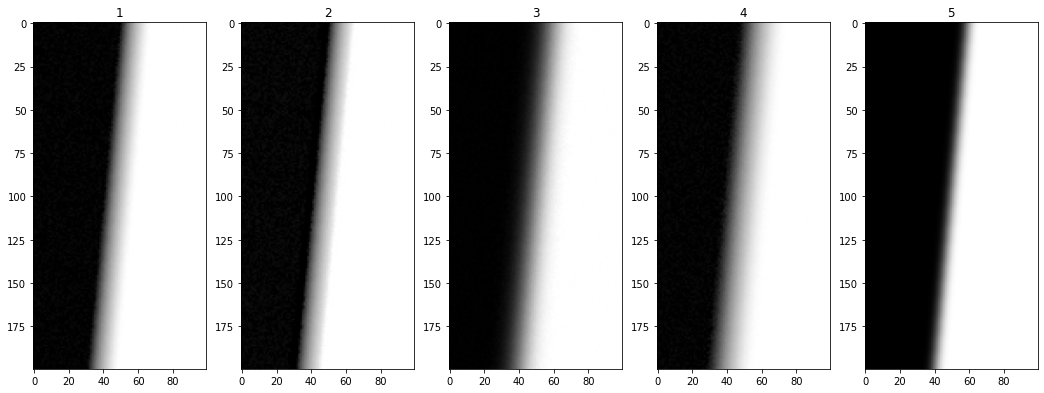

In [17]:
# Загрузка изображений
fig = plt.figure()
fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(nrows=1, ncols=5,figsize=(18, 14))
ax1.set_title('1')
ax2.set_title('2')
ax3.set_title('3')
ax4.set_title('4')
ax5.set_title('5')
image1 = io.imread("1.png")
image2 = io.imread("2.png")
image3 = io.imread("3.png")
image4 = io.imread("cam-lens.png")
image5 = io.imread("cam.png")
ax1.imshow(image1,  cmap="gray")
ax2.imshow(image2,  cmap="gray")
ax3.imshow(image3,  cmap="gray")
ax4.imshow(image4,  cmap="gray")
ax5.imshow(image5,  cmap="gray")
plt.show()

In [18]:
# Выравнивание изображения
def rotate(img): 
    img = transform.rotate(img, 5.3, preserve_range=True)
    row = img[len(img)//2] / 255
    image = np.full(img.shape, row)
    return image

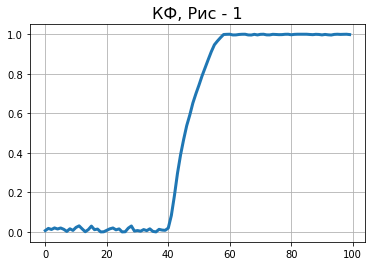

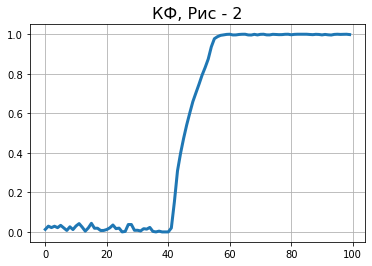

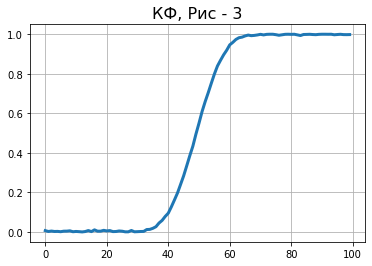

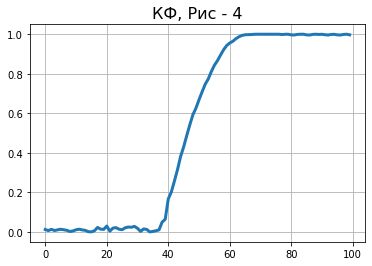

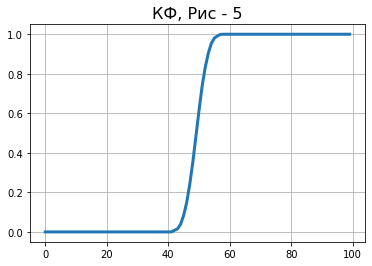

In [19]:
# КФ
def draw_kf(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth = 3)
    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("КФ, Рис - " + add_to_title, fontsize=16,color='red')
    plt.grid()
    plt.show()
edg_1 = rotate(image1)
edg_2 = rotate(image2)
edg_3 = rotate(image3)
edg_4 = rotate(image4)
edg_5 = rotate(image5)
draw_kf(edg_1, '1')
draw_kf(edg_2, '2')
draw_kf(edg_3, '3')
draw_kf(edg_4, '4')
draw_kf(edg_5, '5')

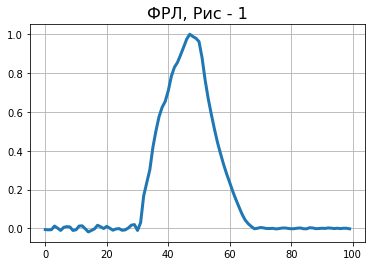

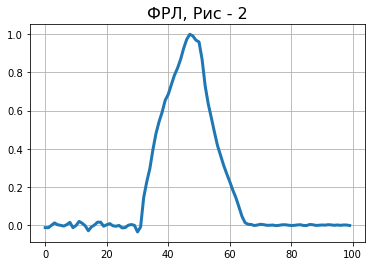

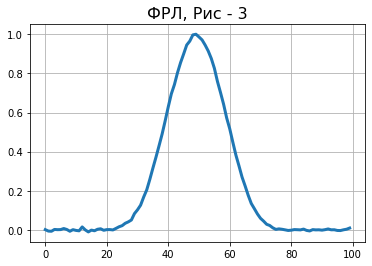

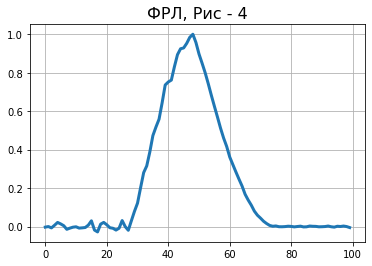

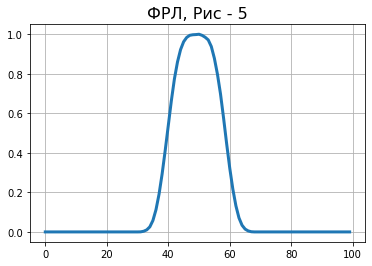

In [20]:
# ФРЛ
def draw_frl(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    y1 = np.gradient(y)
    y1 /= max(y1)   # Нормирование графика
    fig, ax = plt.subplots()
    ax.plot(x, y1, linewidth = 3,color='red')
    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("ФРЛ, Рис - " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()
draw_frl(image1, '1')
draw_frl(image2, '2')
draw_frl(image3, '3')
draw_frl(image4, '4')
draw_frl(image5, '5')

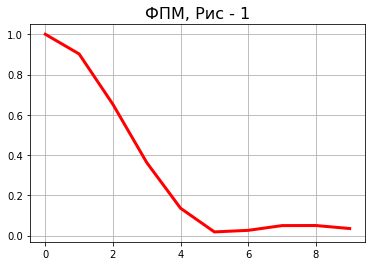

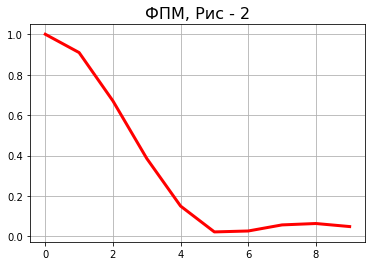

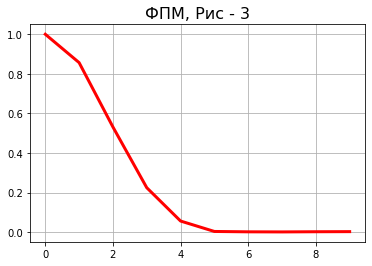

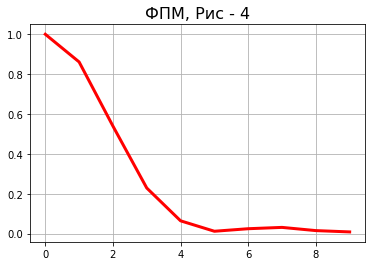

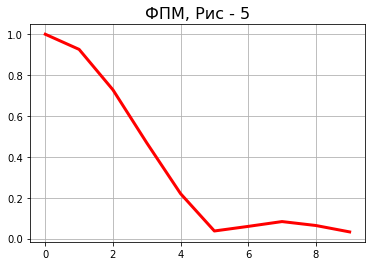

In [23]:
#ФМП
def draw_fpm(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    y1 = np.gradient(y)
    y1 = np.fft.fft(y1)    # Дискретное фурье преобразование
    fig, ax = plt.subplots()
    ax.plot(x[:len(x)//10], np.abs(y1 / max(y1))[:len(x)//10], linewidth = 3, color='red')

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("ФПМ, Рис - " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()
draw_fpm(image1, '1')
draw_fpm(image2, '2')
draw_fpm(image3, '3')
draw_fpm(image4, '4')
draw_fpm(image5, '5')

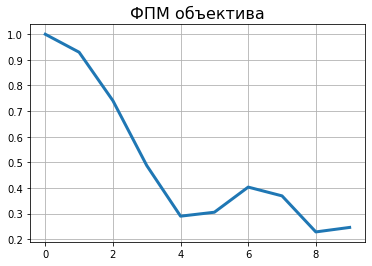

In [22]:
# ФМП объектива
def divide_fpm(img1, img2, add_to_title = ""):
    y1 = np.mean(img1, axis=0)
    x1 = np.arange(len(y1))
    y11 = np.gradient(y1)
    y11 = np.fft.fft(y11)
    y2 = np.mean(img2, axis=0)
    x2 = np.arange(len(y2))
    y12 = np.gradient(y2)
    y12 = np.fft.fft(y12)
    fig, ax = plt.subplots()
    line1=np.abs(y11 / max(y11))[:len(x1)//10]
    line2=np.abs(y12 / max(y12))[:len(x2)//10]
    ax.plot(x1[:len(x1)//10], np.divide(line1, line2), linewidth = 3,color='red')
    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title(add_to_title, fontsize=16)
    plt.grid()
    plt.show()
divide_fpm(image4, image5, "ФПМ объектива")